# Project Title : Prediction of Rainfall (Classification Model)
---------------------------------------------------------------

#### Given Statement :
"The Weather Oracle" newspaper in Sydney aims to predict the upcoming weather in order to provide a valuable service to the community. The newspaper has become one of the most widely read and respected sources of news and information in Sydney. They are currently working on developing a machine learning model using various classification methods to predict rainfall. The dataset contains weather information for Sydney from 2008 to 2017, with 18 columns:
* ******Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity at 9am and 3pm, Pressure at 9am and 3pm, Cloud at 9am and 3pm, Temperature at 9am and 3pm, RainToday (Boolean: 1 if precipitation exceeds 1mm, otherwise 0), and RainTomorrow (Boolean: next day rain)******.

#### Objective View on Statement :
As a machine learning engineer, I will explore this data and apply my skills to conduct in-depth analysis. This will involve the following process :
* ******Exploratory Data analysis (EDA) & Data-Cleaning, Statistical analysis, Data visualization, Data preprocessing and Model building.******

In [299]:
#Importing Python Libraries
import pandas as pd                                                          #For Data_Manipulation
import numpy as np                                                           #For Data_Dimensions and other mathematical functions
import warnings                                                              #For smooth interface while running
from termcolor import colored                                                #For Highlighting Values
import matplotlib.pyplot as plt                                              #For Data_Visualization                                             
import seaborn as sns                                                        #For Advance_Visualization
sns.set_style('white')                                                       # Seaborn visualizing style
warnings.filterwarnings('ignore')                                            

In [300]:
#Importing Data
Df = pd.read_excel('C:/Users/welcome/Downloads/sydney_rain prediction.xlsx', header=0)
Df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes


In [3]:
Df.tail(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3334,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No
3336,2017-06-25,Sydney,7.6,19.3,0.0,3.4,9.4,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No


#### About the data:
--------------------
The dataset consists of approximately ******10 years****** of daily weather data from Sydney, Australia, collected from various weather stations. The goal of this project is to use this data to predict whether it will rain the next day. There are ******16 attributes******, with the target variable being ******"RainTomorrow"******, which indicates whether it will rain the following day or not ("Location&Date" column is not required as it's obviously Sydney).

In [8]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

#### Points to notice: 
* ******There are missing values in the dataset****** & ******Dataset includes numeric and categorical values******
----------------------------------------------------------------------------------------------------------------------

# EDA & Data Cleaning
------------------------------
### Missing Values Imputation :
* **Mean Imputation**   : Suitable for continuous numerical data with a normal distribution.            
*  **Median Imputation** : Suitable for continuous numerical data with skewness or presence of outliers. 
*  **Mode Imputation**   : Suitable for categorical or ordinal data.                                     

In [21]:
df_num = Df.select_dtypes(include = ['float64', 'int64'])   #Numerical Data
df_num.isna().sum()                                         #Counting  Missing Values

MinTemp          3
MaxTemp          2
Rainfall         6
Evaporation     51
Sunshine        16
Humidity9am     14
Humidity3pm     13
Pressure9am     20
Pressure3pm     19
Cloud9am       566
Cloud3pm       561
Temp9am          4
Temp3pm          4
dtype: int64

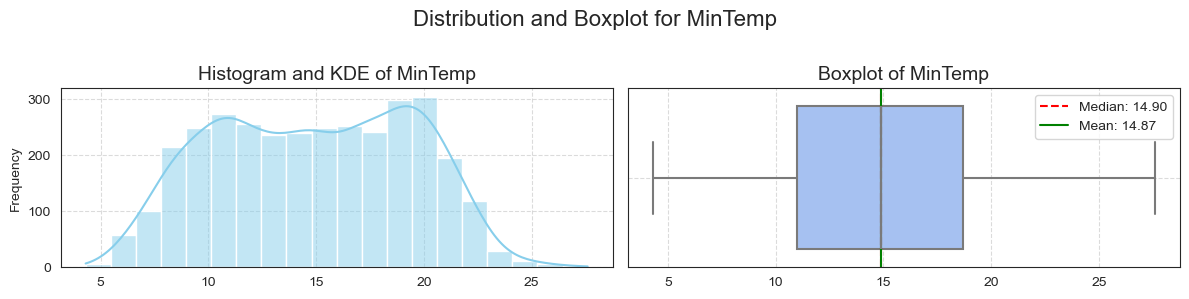

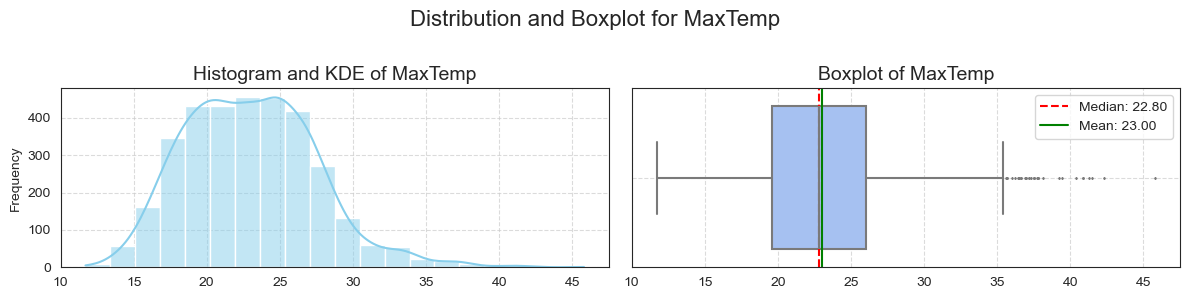

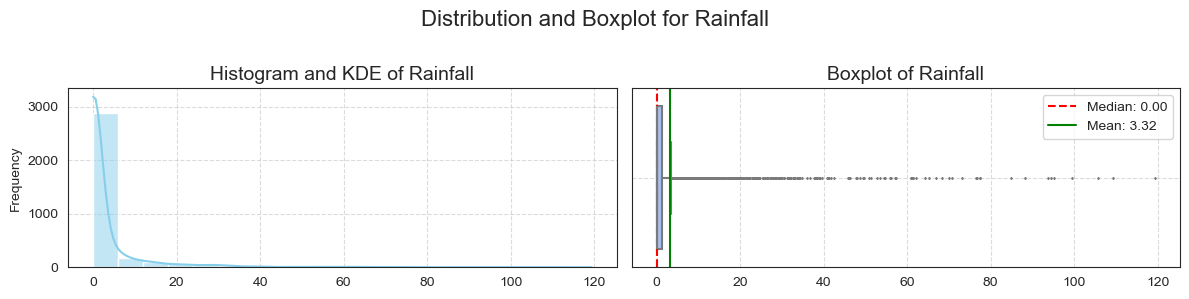

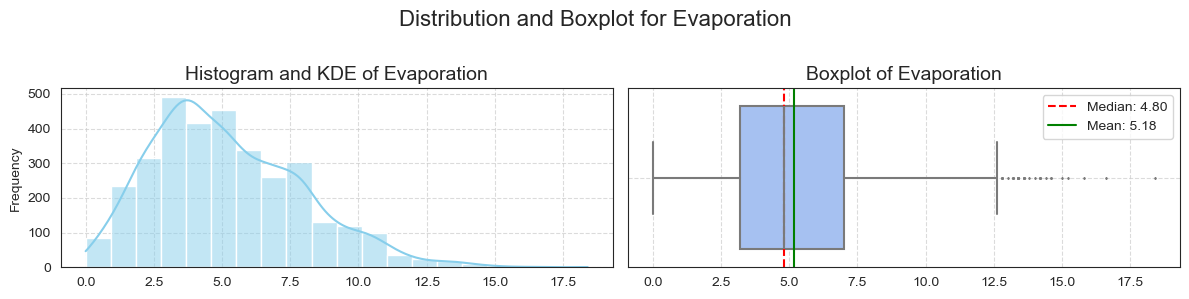

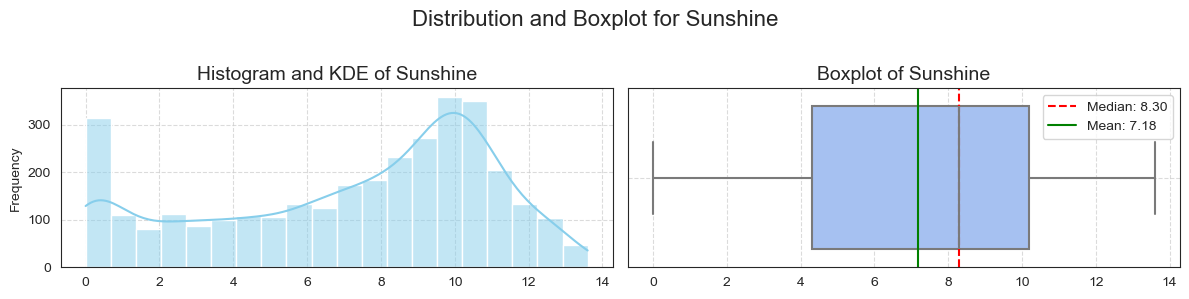

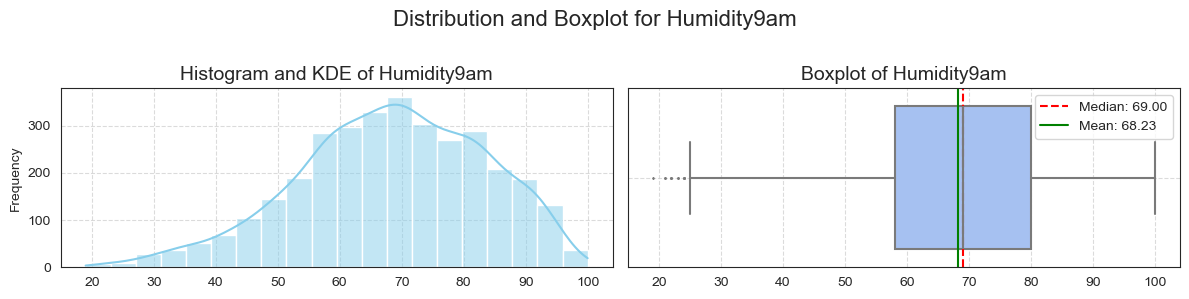

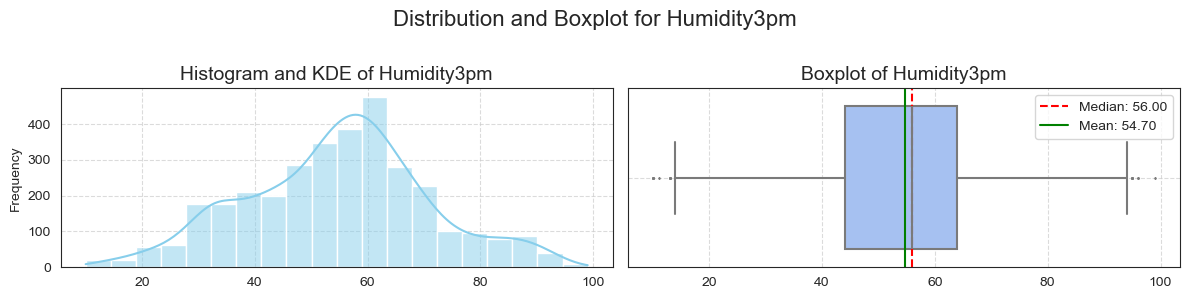

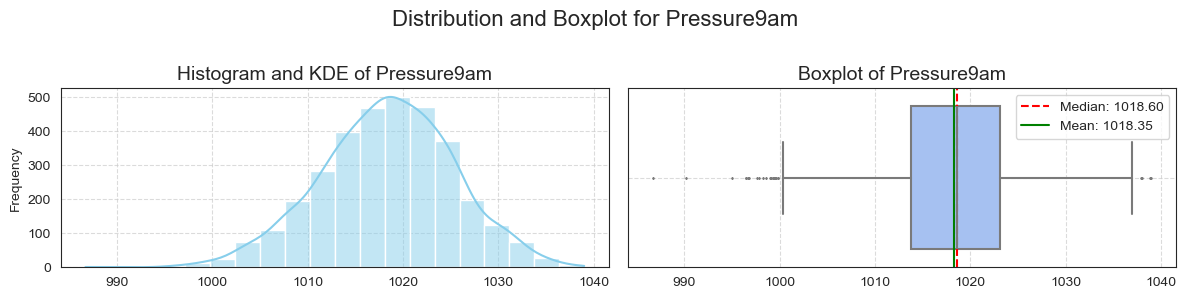

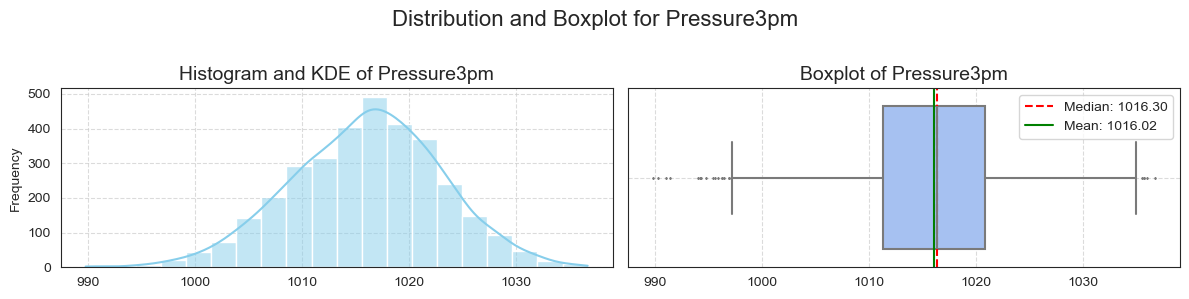

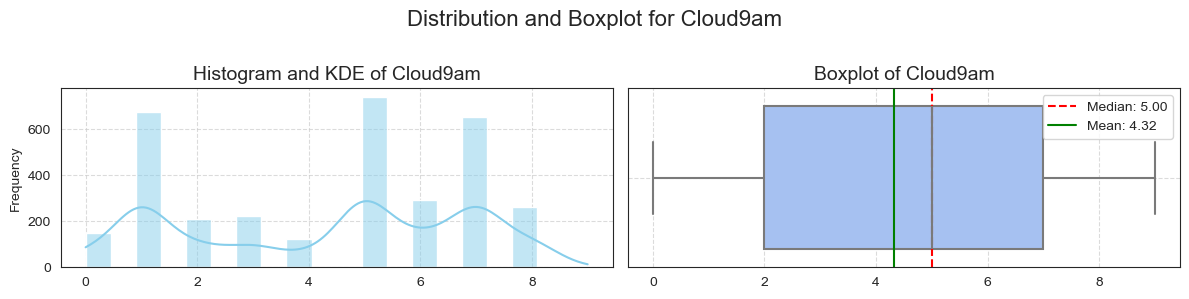

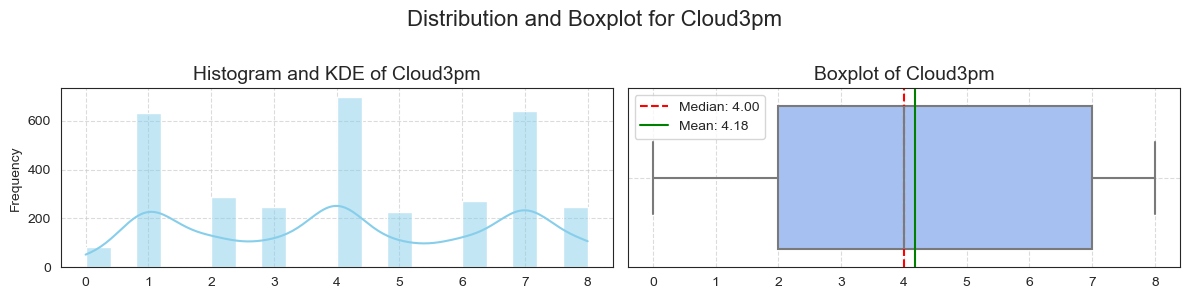

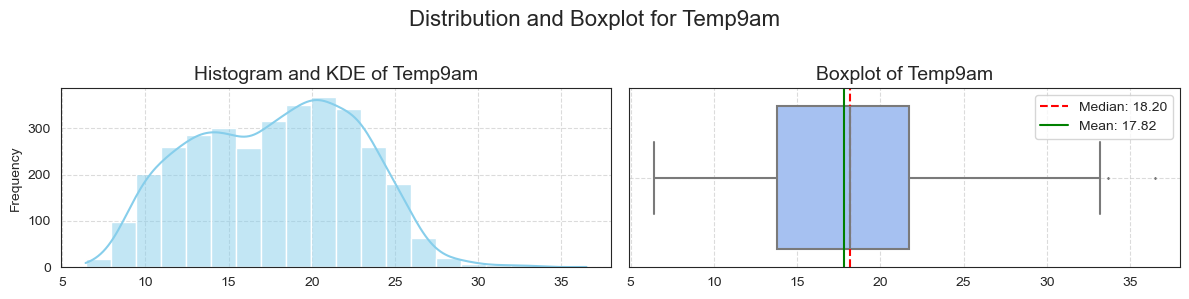

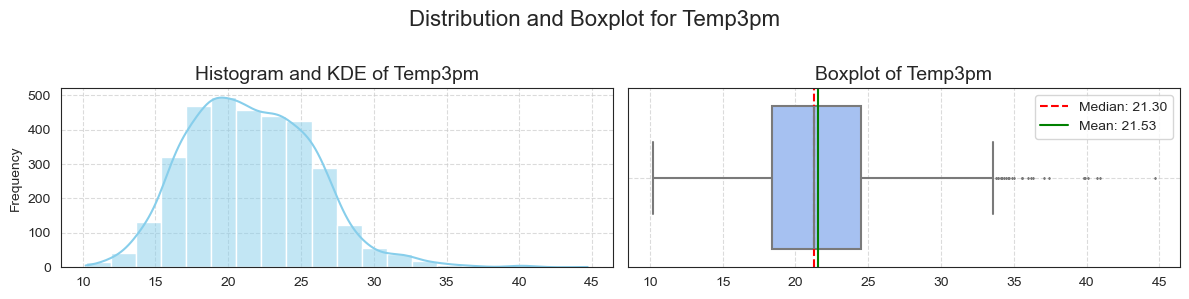

In [82]:
for i in df_num.columns:
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))

    # Add a title for the entire figure
    fig.suptitle(f'Distribution and Boxplot for {i}', fontsize=16)

    # Histogram with KDE
    sns.histplot(df_num[i], bins=20, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title(f'Histogram and KDE of {i}', fontsize=14)
    axs[0].set_xlabel('')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True, linestyle='--', alpha=0.7)

    # Boxplot
    sns.boxplot(x=df_num[i], ax=axs[1], color='#99befd', fliersize=1)
    axs[1].set_title(f'Boxplot of {i}', fontsize=14)
    axs[1].set_xlabel('')
    axs[1].grid(True, linestyle='--', alpha=0.7)

    # Adding annotations for median, mean, and outliers on the boxplot
    median = df_num[i].median()
    mean = df_num[i].mean()
    axs[1].axvline(median, color='r', linestyle='--', label=f'Median: {median:.2f}')
    axs[1].axvline(mean, color='g', linestyle='-', label=f'Mean: {mean:.2f}')
    axs[1].legend()

    # Improve layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()

In [302]:
#Median Value Imputation for Missing Values in Numerical Datas
for col in Df.select_dtypes(include='float64'):
    Df[col].fillna(Df[col].median(), inplace=True)
    
Df.isna().sum()

Date            0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [17]:
Df.describe(include = object)

,Location,RainToday,RainTomorrow
count,3337,3331,3337
unique,1,2,2
top,Sydney,No,No
freq,3337,2465,2472


In [301]:
Df = Df.drop(columns=['Location'], axis=1)                         #Removing the Location_Column('Sydney')
Df['RainToday'].fillna(Df['RainToday'].mode()[0], inplace=True)    #Replacing Missing Categorical Variable with Mode_Value

### Checking Class Imbalance: (Yes, No)
----------------------------
* In machine learning, a class imbalance occurs when the number of instances in one class is much higher than in another. This can lead to problems because most learning algorithms assume a roughly equal distribution of classes and may become biased toward the majority class.

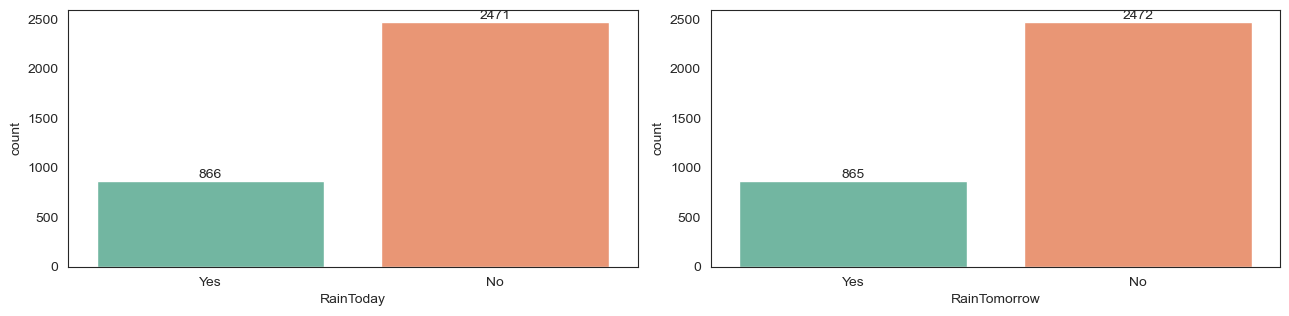

In [32]:
#Visualize our data is imbalanced or not
plt.figure(figsize=(13,6))
plt.subplot(2, 2, 1)
ax = sns.countplot(x ='RainToday',data=Df,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.subplot(2, 2, 2)
ax = sns.countplot(x ='RainTomorrow',data=Df,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.tight_layout()

We can observe that presence of **"Yes"** and **"No"** in Target Variable **'RainTomorrow'** are almost in the ratio **1:3**. So there is a class imbalance and we have to handle it later.

### Checking the Days Count in Calendar-View
--------------------------------------------
* Encoding days in the Dataset with year-wise and month-wise

In [303]:
#Separating the year, month, day and hour values and storing each in a separate column
Df['Year'] = Df['Date'].dt.year
Df['Month'] = Df['Date'].dt.month_name()
Df['Day'] = Df['Date'].dt.day
Df.loc[:,['Date'] + list(Df.columns)[-3:]].head(2)

,Date,Year,Month,Day
0,2008-02-01,2008,February,1
1,2008-02-02,2008,February,2


In [304]:
# Group by Year and Month, and count the number of days
Df_grouped = Df.groupby(['Year', 'Month'])['Day'].count().unstack()

# Add a 'Total' column and row
Df_grouped['Total'] = Df_grouped.sum(axis=1)
Df_grouped.loc['Total'] = Df_grouped.sum()
Df_grouped = Df_grouped.applymap('{:.0f}'.format)

# Display the table
print(Df_grouped.to_string())

Month April August December February January July June March  May November October September Total
Year                                                                                              
2008     30     31       31       29     nan   31   30    31   31       30      31        30   335
2009     30     31       31       28      31   31   30    31   31       30      31        30   365
2010     30     31       31       28      31   31   29    31   31       29      30        30   362
2011    nan     31       31       28      31   31   30    31   31       30      31        30   335
2012     30     31      nan       29      31   31   30    31   31       30      31        30   335
2013     30     31       31      nan      31   31   30    31   31       30      31        30   337
2014     30     31       31       28      31   31   30    31   31       28      30        29   361
2015     30     31       31       28      31   31   30    31   31       30      31        30   365
2016     3

# Statistical Analysis
----------------------

In [67]:
Df.describe(include=['float64','int64']).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3337.0,14.865088,4.551593,4.3,11.0,14.9,18.7,27.6
MaxTemp,3337.0,23.002218,4.493293,11.7,19.6,22.8,26.0,45.8
Rainfall,3337.0,3.324243,9.887277,0.0,0.0,0.0,1.4,119.4
Evaporation,3337.0,5.181510,2.756505,0.0,3.2,4.8,7.0,18.4
Sunshine,3337.0,7.184747,3.802525,0.0,4.3,8.3,10.2,13.6
Humidity9am,3337.0,68.232245,15.053751,19.0,58.0,69.0,80.0,100.0
Humidity3pm,3337.0,54.704225,16.261954,10.0,44.0,56.0,64.0,99.0
Pressure9am,3337.0,1018.347678,7.000519,986.7,1013.8,1018.6,1023.1,1039.0
Pressure3pm,3337.0,1016.020375,7.012189,989.8,1011.3,1016.3,1020.8,1036.7
Cloud9am,3337.0,4.320348,2.524256,0.0,2.0,5.0,7.0,9.0


#### Points to notice: 
* The mean in **Rainfall** was **3.32**, and the standard deviation was **9.88** (mean < std). We noticed some **outliers** in the data.

### Correlation 
----------------

In [43]:
Df.select_dtypes(['float64','int64']).corr().style.format(precision=3).background_gradient(axis=1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000,0.771,0.013,0.568,-0.063,0.052,0.271,-0.393,-0.356,0.238,0.163,0.939,0.752
MaxTemp,0.771,1.000,-0.140,0.510,0.325,-0.187,-0.152,-0.389,-0.425,-0.088,-0.099,0.859,0.960
Rainfall,0.013,-0.140,1.000,-0.108,-0.306,0.331,0.302,-0.037,0.003,0.244,0.200,-0.056,-0.144
Evaporation,0.568,0.510,-0.108,1.000,0.177,-0.396,-0.104,-0.345,-0.300,-0.042,-0.038,0.606,0.475
Sunshine,-0.063,0.325,-0.306,0.177,1.000,-0.489,-0.582,-0.046,-0.094,-0.662,-0.674,0.115,0.344
Humidity9am,0.052,-0.187,0.331,-0.396,-0.489,1.000,0.658,0.263,0.251,0.431,0.329,-0.148,-0.157
Humidity3pm,0.271,-0.152,0.302,-0.104,-0.582,0.658,1.000,0.155,0.183,0.461,0.468,0.128,-0.214
Pressure9am,-0.393,-0.389,-0.037,-0.345,-0.046,0.263,0.155,1.000,0.961,-0.014,-0.039,-0.419,-0.346
Pressure3pm,-0.356,-0.425,0.003,-0.300,-0.094,0.251,0.183,0.961,1.000,0.017,-0.002,-0.404,-0.392
Cloud9am,0.238,-0.088,0.244,-0.042,-0.662,0.431,0.461,-0.014,0.017,1.000,0.600,0.089,-0.091


### Hypothesis Testing : (RainToday & RainTomorrow)
-----------------------
**Chi-Square Test of Independence** : To test if there is a significant association between RainToday and RainTomorrow.
* **Null Hypothesis (H0)**: There is no relationship between RainToday and RainTomorrow.
* **Alternative Hypothesis (H1)**: There is a relationship between RainToday and RainTomorrow.

In [305]:
# Convert 'RainToday' and 'RainTomorrow' to binary (1/0)
Df['RainToday'] = Df['RainToday'].map({'No': 0, 'Yes': 1})
Df['RainTomorrow'] = Df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [306]:
#Importing Python library for Statistics
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(Df['RainToday'], Df['RainTomorrow'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(colored(f'Chi-Square Statistic: {chi2}, p-value: {p}','red'))

Chi-Square Statistic: 386.0164325106483, p-value: 6.0969974172835344e-86


#### Interpretation of result :
- **Chi-Square Statistic**: The very high Chi-Square statistic suggests a **strong association** between the variables **RainToday** and **RainTomorrow**.
- **p-value**: The p-value is significantly **smaller** than the common **alpha level of 0.05**, providing strong evidence to **reject the null hypothesis**

In [49]:
#Correlation Analysis between RainToday and RainTomorrow
Df[['RainToday', 'RainTomorrow']].corr().style.format(precision=3).background_gradient(axis=1)

,RainToday,RainTomorrow
RainToday,1.000,0.341
RainTomorrow,0.341,1.000


A correlation value of **0.341** indicates a **positive correlation** between **RainToday and RainTomorrow**. In general terms, this suggests that if it rains today, there is a higher likelihood of rain tomorrow compared to if it doesn't rain today. However, the correlation is **not very strong.**

# Data Visualization
--------------------

Text(0.5, 1.0, 'Rainfall over years in Sydney')

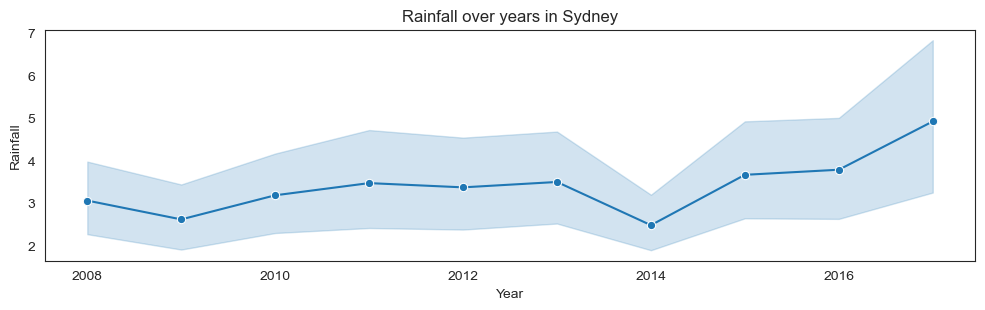

In [58]:
plt.figure(figsize=(12,3))
sns.lineplot(data=Df, x='Year',y='Rainfall',marker='o')
plt.title('Rainfall over years in Sydney')

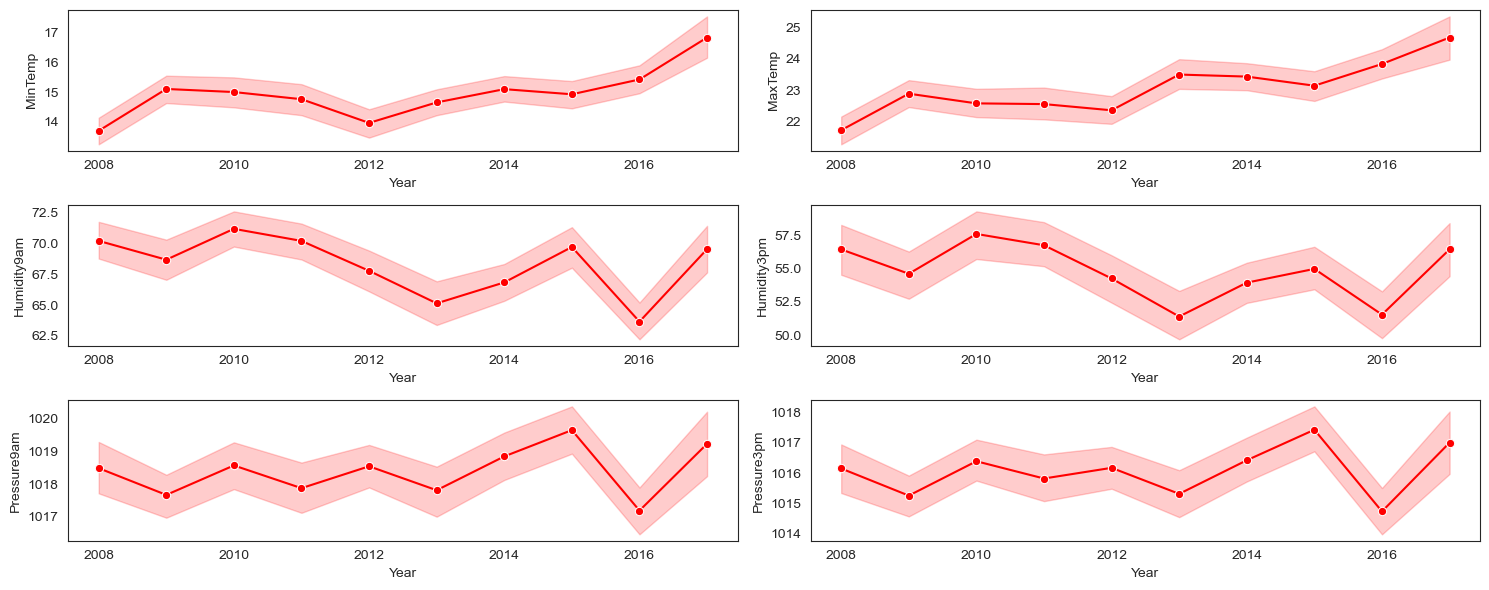

In [65]:
fig, axes = plt.subplots(figsize=(15, 6), nrows=3, ncols=2)

i = 0
j = 0
columns = ['MinTemp', 'MaxTemp','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

for col in columns:
    sns.lineplot(ax=axes[i, j], data=Df, x='Year', y=col, color='red', marker='o')
    if j == 1:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

# Data Preprocessing
--------------------
### Steps involved in Data Preprocessing:
* Detecting outliers
* Dropping\Capping the outliers based on data analysis
* Perform Multicollinearity
* Train_Test Split

In [307]:
#Importing Python Library for Preprocessing the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [308]:
#Coping the Data for further process
df = Df.copy()
df.head(2)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,2008,February,1
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,2008,February,2


* **We will drop Date,Year,Month,Day column because they have a High cardinality**

## Scaling
----------

In [309]:
# Prepairing attributes of scale data

X = df.drop(['Date','Year','Month','Day'], axis=1) # dropping target and extra columns

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X = s_scaler.fit_transform(X)
X = pd.DataFrame(X, columns=col_names) 

X.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3337.0,-1.703429e-17,1.00015,-2.321532,-0.849300,0.007671,0.842669,2.798321
MaxTemp,3337.0,-9.028173e-16,1.00015,-2.515730,-0.757290,-0.045011,0.667268,5.074496
Rainfall,3337.0,8.517144e-18,1.00015,-0.336265,-0.336265,-0.336265,-0.194647,11.741671
Evaporation,3337.0,4.258572e-16,1.00015,-1.880021,-0.718957,-0.138424,0.659807,4.796099
Sunshine,3337.0,8.943001e-17,1.00015,-1.889751,-0.758754,0.293337,0.793080,1.687356
Humidity9am,3337.0,1.703429e-16,1.00015,-3.270921,-0.679816,0.051009,0.781833,2.110605
Humidity3pm,3337.0,-2.214457e-16,1.00015,-2.749419,-0.658336,0.079693,0.571713,2.724298
Pressure9am,3337.0,-5.578729e-15,1.00015,-4.521439,-0.649717,0.036049,0.678955,2.950555
Pressure3pm,3337.0,1.161313e-14,1.00015,-3.739817,-0.673268,0.039883,0.681719,2.949539
Cloud9am,3337.0,-1.746015e-16,1.00015,-1.711790,-0.919358,0.269289,1.061720,1.854152


## Outlier Validation
---------------------

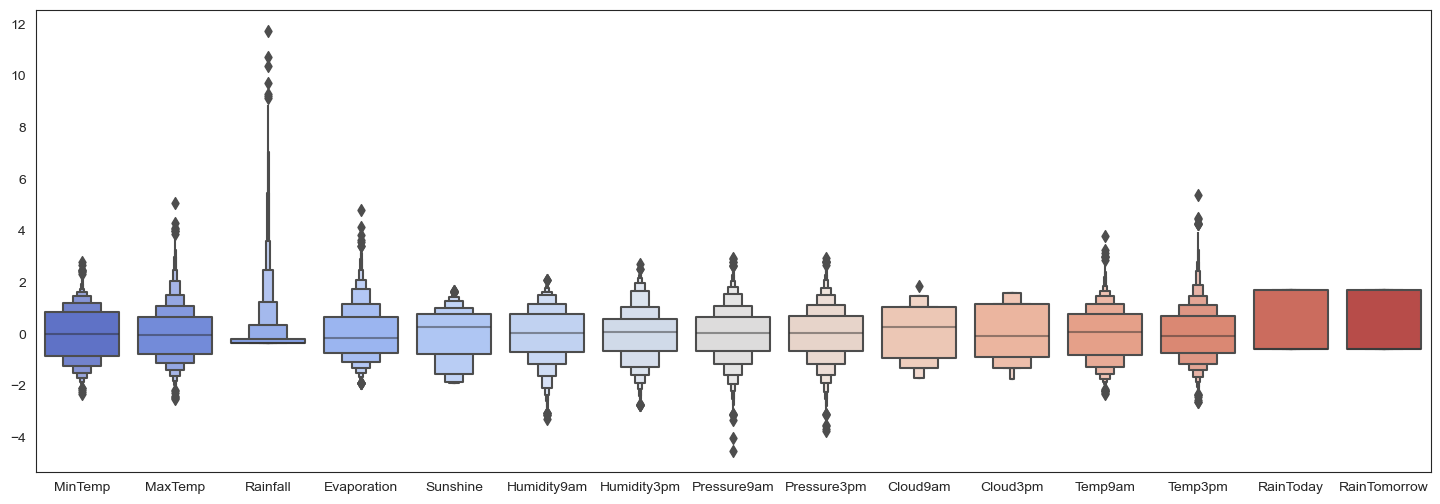

In [310]:
#Detecting outliers
#looking at the scaled features
plt.figure(figsize=(18,6))
sns.boxenplot(data = X,palette = 'coolwarm')
plt.xticks(rotation=0)
plt.show()

**Capping Outliers Based on Data Analysis** because removing outliers reduces the dataset size, which can be problematic if the dataset is small.

In [311]:
lower_limit = X.quantile(0.01)
upper_limit = X.quantile(0.99)
df_bound = pd.DataFrame({'Lower Bound': lower_limit, 'Upper Bound': upper_limit})

# Print the DataFrame
print(df_bound.to_string())

              Lower Bound  Upper Bound
MinTemp         -1.904034     1.897403
MaxTemp         -1.914744     2.788080
Rainfall        -0.336265     4.953750
Evaporation     -1.734888     2.764237
Sunshine        -1.889751     1.529543
Humidity9am     -2.540096     1.844850
Humidity3pm     -2.257399     2.293781
Pressure9am     -2.396707     2.215642
Pressure3pm     -2.431613     2.231253
Cloud9am        -1.711790     1.457936
Cloud3pm        -1.734827     1.583908
Temp9am         -1.904598     2.052468
Temp3pm         -1.960939     2.611533
RainToday       -0.592001     1.689186
RainTomorrow    -0.591540     1.690504


In [313]:
# Function to cap outliers for multiple columns
def cap_outliers(X, cols):
    df_capped = X.copy()
    for col in cols:
        lower_limit = X[col].quantile(0.01)
        upper_limit = X[col].quantile(0.99)
        df_capped[col] = X[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    return df_capped

# Assuming X is your DataFrame containing standardized features
columns_to_cap = X.columns

# Cap outliers
X_capped = cap_outliers(X, columns_to_cap)

# Combine original and capped DataFrames for comparison dynamically
comparison_data = {}
for col in columns_to_cap:
    comparison_data[f'Original {col}'] = X[col]
    comparison_data[f'Capped {col}'] = X_capped[col]

comparison_df = pd.DataFrame(comparison_data)

# Display the first few rows
comparison_df.head(2)#Change the head(size) for complete_view                                             #Checkout the Capped Values for Clarification

,Original MinTemp,Capped MinTemp,Original MaxTemp,Capped MaxTemp,Original Rainfall,Capped Rainfall,Original Evaporation,Capped Evaporation,Original Sunshine,Capped Sunshine,...,Original Cloud3pm,Capped Cloud3pm,Original Temp9am,Capped Temp9am,Original Temp3pm,Capped Temp3pm,Original RainToday,Capped RainToday,Original RainTomorrow,Capped RainTomorrow
0,1.018458,1.018458,-0.134046,-0.134046,1.241757,1.241757,0.369541,0.369541,-1.889751,-1.889751,...,1.583908,1.583908,0.588492,0.588492,-0.147204,-0.147204,1.689186,1.689186,1.690504,1.690504
1,1.018458,1.018458,0.578233,0.578233,0.270667,0.270667,-0.646390,-0.646390,-1.179590,-1.179590,...,1.169066,1.169066,0.935890,0.935890,0.759663,0.759663,1.689186,1.689186,1.690504,1.690504


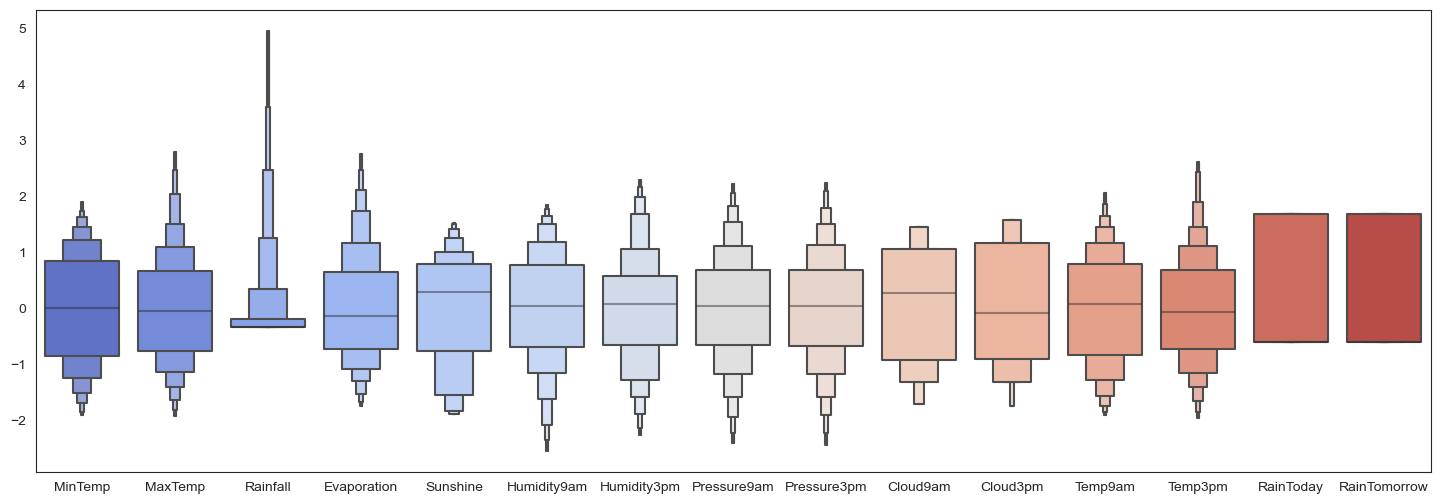

In [314]:
plt.figure(figsize=(18,6))
sns.boxenplot(data = X_capped,palette = 'coolwarm')
plt.xticks(rotation=0)
plt.show()

 - We can now see that the outliers in the columns are capped.

In [315]:
X_capped.shape

(3337, 15)

## Multicollinearity
--------------------

In [246]:
# lets see the correlation between eachother 
X_capped.corr().style.format(precision=3).background_gradient(axis=1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000,0.774,0.013,0.569,-0.063,0.058,0.276,-0.396,-0.358,0.239,0.163,0.940,0.760,0.020,0.080
MaxTemp,0.774,1.000,-0.152,0.514,0.327,-0.181,-0.139,-0.393,-0.427,-0.088,-0.100,0.860,0.960,-0.188,-0.150
Rainfall,0.013,-0.152,1.000,-0.126,-0.326,0.358,0.318,-0.028,0.018,0.264,0.214,-0.062,-0.154,0.617,0.313
Evaporation,0.569,0.514,-0.126,1.000,0.179,-0.394,-0.101,-0.346,-0.303,-0.042,-0.038,0.608,0.481,-0.232,-0.065
Sunshine,-0.063,0.327,-0.326,0.179,1.000,-0.491,-0.584,-0.046,-0.095,-0.663,-0.674,0.115,0.346,-0.367,-0.521
Humidity9am,0.058,-0.181,0.358,-0.394,-0.491,1.000,0.658,0.263,0.253,0.432,0.330,-0.139,-0.151,0.402,0.331
Humidity3pm,0.276,-0.139,0.318,-0.101,-0.584,0.658,1.000,0.151,0.181,0.463,0.470,0.138,-0.196,0.343,0.473
Pressure9am,-0.396,-0.393,-0.028,-0.346,-0.046,0.263,0.151,1.000,0.961,-0.014,-0.039,-0.422,-0.349,0.002,-0.033
Pressure3pm,-0.358,-0.427,0.018,-0.303,-0.095,0.253,0.181,0.961,1.000,0.018,-0.002,-0.406,-0.393,0.059,0.012
Cloud9am,0.239,-0.088,0.264,-0.042,-0.663,0.432,0.463,-0.014,0.018,1.000,0.600,0.090,-0.091,0.317,0.331


The following feature pairs have a strong correlation with each other:
* MaxTemp and MinTemp
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* Evaporation and MaxTemp
* MaxTemp and Temp3pm

**Now we will search for columns that has a correlation more than 70% and drop one of them with the condition that the correlation with the target column (RainTomorrow) is smaller than another column**

In [157]:
# check the correlation for columns => MinTemp & MaxTemp with the target
print(f"Correlation between MinTemp and MaxTemp :{df['MinTemp'].corr(df['MaxTemp'])}")

print(f"Correlation between MinTemp and the target :{df['MinTemp'].corr(df['RainTomorrow'])}")

print(f"Correlation between MaxTemp and the target :{df['MaxTemp'].corr(df['RainTomorrow'])}")

Correlation between MinTemp and MaxTemp :0.770685682371905
Correlation between MinTemp and the target :0.07995790175469963
Correlation between MaxTemp and the target :-0.14925321561762078


In [158]:
# check the correlation for columns => Temp3pm & Temp9am with the target
print(f"Correlation between Temp3pm and Temp9am :{df['Temp3pm'].corr(df['Temp9am'])}")

print(f"Correlation between Temp3pm and the target :{df['Temp3pm'].corr(df['RainTomorrow'])}")

print(f"Correlation between Temp9am and the target :{df['Temp9am'].corr(df['RainTomorrow'])}")

Correlation between Temp3pm and Temp9am :0.8286568006963791
Correlation between Temp3pm and the target :-0.1889122595873978
Correlation between Temp9am and the target :-0.0007226489397859883


* From the above result, we can conclude that **0.00 correlation range are negligible** so **'MaxTemp' & 'Temp9am'**  negligible with Target

In [316]:
# Drop 'MinTemp' ,'Temp9am' column & Target 'rainTomorrow' Column
Features = X_capped.drop(columns = ['MinTemp','Temp9am','RainTomorrow'])
Target = df['RainTomorrow']

### Train_Test Split
--------------------
###### Train_Dataset = 75% , Test_Dataset = 25%

In [364]:
# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size = 0.25, random_state = 100)

print('Shape of training Feature:',(colored(X_train.shape, 'red')))
print('Shape of testing Feature:',(colored(X_test.shape, 'red')))
print('Shape of training Target:',(colored(y_train.shape, 'red')))
print('Shape of testing Target:', (colored(y_test.shape, 'red')))

Shape of training Feature: (2502, 12)
Shape of testing Feature: (835, 12)
Shape of training Target: (2502,)
Shape of testing Target: (835,)


### Baseline Dummy Classifier Model 
* Using a DummyClassifier helps in understanding the minimum performance level that any model should surpass to be considered useful and the DummyClassifier is used to establish a baseline accuracy using simple heuristics.

In [329]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy_classifier = DummyClassifier(strategy='stratified', random_state=42) 
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.5904


# Model Building
----------------
### Supervised Learning Models

In [416]:
#Importing Modelling Python Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
#Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.metrics import precision_recall_curve

#### Simple Evaluation of Logistic Regression Model
----------------------------------------------------
##### Checking for over-fitting & Under-fitting
* By Checking Train-score & Test-Score

In [328]:
# Logistic Regression for 'RainTomorrow'
model_lr = LogisticRegression(solver='liblinear',max_iter=500, random_state = 0)
model_lr.fit(X_train, y_train)

# Predict and evaluate for 'RainTomorrow'
y_pred_train = model_lr.predict(X_train)
y_pred_test  = model_lr.predict(X_test)

print("RainTomorrow Classification Train_Report:\n", classification_report(y_train, y_pred_train))
print("RainTomorrow Confusion Train_Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("RainTomorrow Classification Test_Report:\n", classification_report(y_test, y_pred_test))
print("RainTomorrow Confusion Test_Matrix:\n", confusion_matrix(y_test, y_pred_test))

RainTomorrow Classification Train_Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1856
           1       0.74      0.57      0.64       646

    accuracy                           0.84      2502
   macro avg       0.80      0.75      0.77      2502
weighted avg       0.83      0.84      0.83      2502

RainTomorrow Confusion Train_Matrix:
 [[1729  127]
 [ 279  367]]
RainTomorrow Classification Test_Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       616
           1       0.72      0.53      0.61       219

    accuracy                           0.82       835
   macro avg       0.78      0.73      0.75       835
weighted avg       0.81      0.82      0.81       835

RainTomorrow Confusion Test_Matrix:
 [[570  46]
 [102 117]]


**Conclude : No Over-fitting or Under-fitting by accuracy (Train > Test) and difference is minimum**

* **Our LogisticRegression Classifier Model Predicted with 82% Accuracy**
  - Accuracy = Total Number of Predictions / Number of Correct Predictions
  - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
  - Recall is the ratio of correctly predicted positive observations to all the observations in the actual class.
  - F1-Score provides a balance between precision and recall, offering a single performance metric.
  - Support is the actual number of occurrences of the class in our dataset.

### Cross-Validation for Models
-------------------------------
* **Cross-validation** is a technique used to assess the performance of a machine learning model by dividing the data into multiple subsets and training and testing the model on different subsets. This helps ensure that the model generalizes well to new, unseen data.

In [330]:
from sklearn.model_selection import StratifiedKFold
model_lr = LogisticRegression(solver='liblinear', random_state = 0)

# Initialize the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation with additional parameters
scores = cross_val_score(model_lr, X_train, y_train, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Cross-validation scores: [0.81636727 0.83632735 0.824      0.848      0.848     ]
Mean accuracy: 0.8345389221556886
Standard deviation: 0.01270336709520885


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.4s finished


-----------------------------
## Complete Model Evaluation 
-----------------------------
 - Using **ROC_AUC, Cohen's Kappa, Accuracy, Time_Taken, Confusion-Matrix**

* **Cohen's Kappa** is a statistic that measures inter-rater agreement for categorical items, accounting for chance agreement. It's used to assess the level of agreement or consistency between two raters beyond what would be expected by chance.
  - **0 :** Indicates no agreement beyond what would be expected by chance.
  - **1 :** Represents perfect agreement beyond chance.
  - **Negative Values :** Suggest less agreement than expected by chance, indicating systematic disagreement.

* **ROC Curve** stands for Receiver Operating Characteristic Curve, it is a plot which shows the performance of a classification model at various classification threshold levels, it is a single number summary of classifier performance. The higher the value, the better the classifier.

In [372]:
#Plotting ROU-AUC curve
def plot_roc_cur(fper, tper):
    plt.figure(figsize=(12, 4))  # Create the figure first
    plt.plot(fper, tper, color='orange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Pipeline Function For Models 

In [402]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_test)
    coh_kap = cohen_kappa_score(y_test, y_pred_test)
    clsrp = classification_report(y_test, y_pred_test)
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1)

    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"classification_report\n: {clsrp}")
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()
    
    return model, accuracy, roc_auc, coh_kap, clsrp

### Logistic Regression Model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Training set score: 0.8381
Test set score: 0.8240
Cross-validation scores: [0.82035928 0.83632735 0.824      0.848      0.846     ]
Mean accuracy: 0.8349373253493013
Standard deviation: 0.01119904321849349
ROC Area under Curve = 0.7305973136452588
Cohen's Kappa = 0.5034165523770223
classification_report
:               precision    recall  f1-score   support

           0       0.85      0.93      0.89       616
           1       0.72      0.53      0.61       219

    accuracy                           0.82       835
   macro avg       0.79      0.73      0.75       835
weighted avg       0.82      0.82      0.81       835



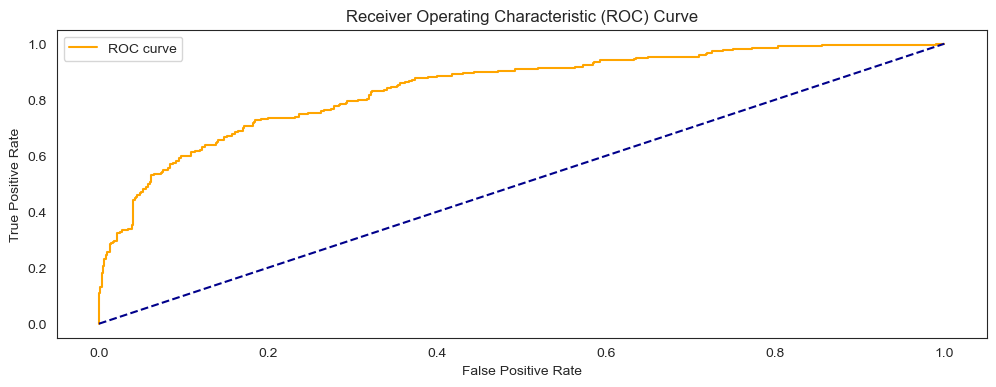

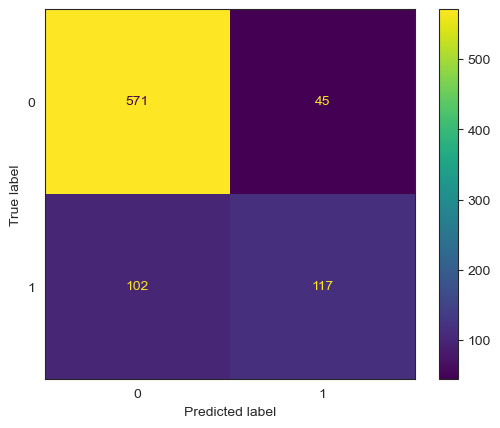

In [403]:
# Logistic Regression for 'RainTomorrow'
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, clsrp_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

**ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.**

### DecisionTree Model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Training set score: 0.8437
Test set score: 0.8132
Cross-validation scores: [0.80239521 0.82834331 0.824      0.828      0.838     ]
Mean accuracy: 0.8241477045908183
Standard deviation: 0.011811200251316016
ROC Area under Curve = 0.6953352013283519
Cohen's Kappa = 0.4472685919903593
classification_report
:               precision    recall  f1-score   support

           0       0.83      0.94      0.88       616
           1       0.74      0.45      0.56       219

    accuracy                           0.81       835
   macro avg       0.78      0.70      0.72       835
weighted avg       0.80      0.81      0.80       835



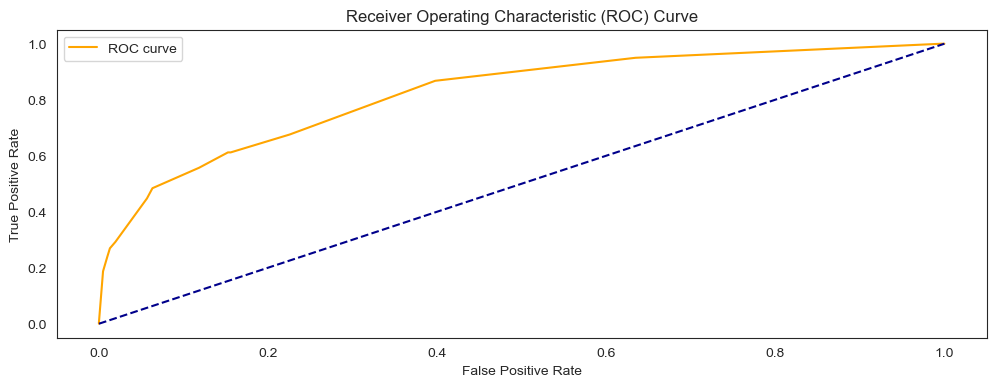

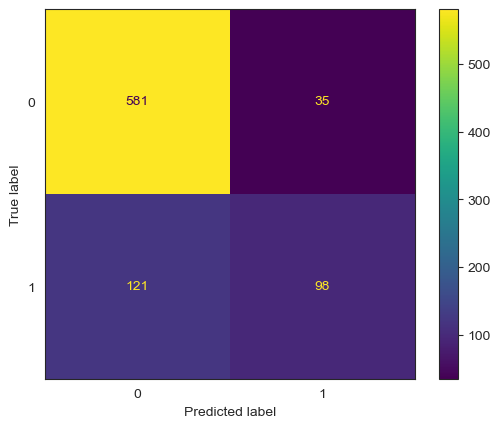

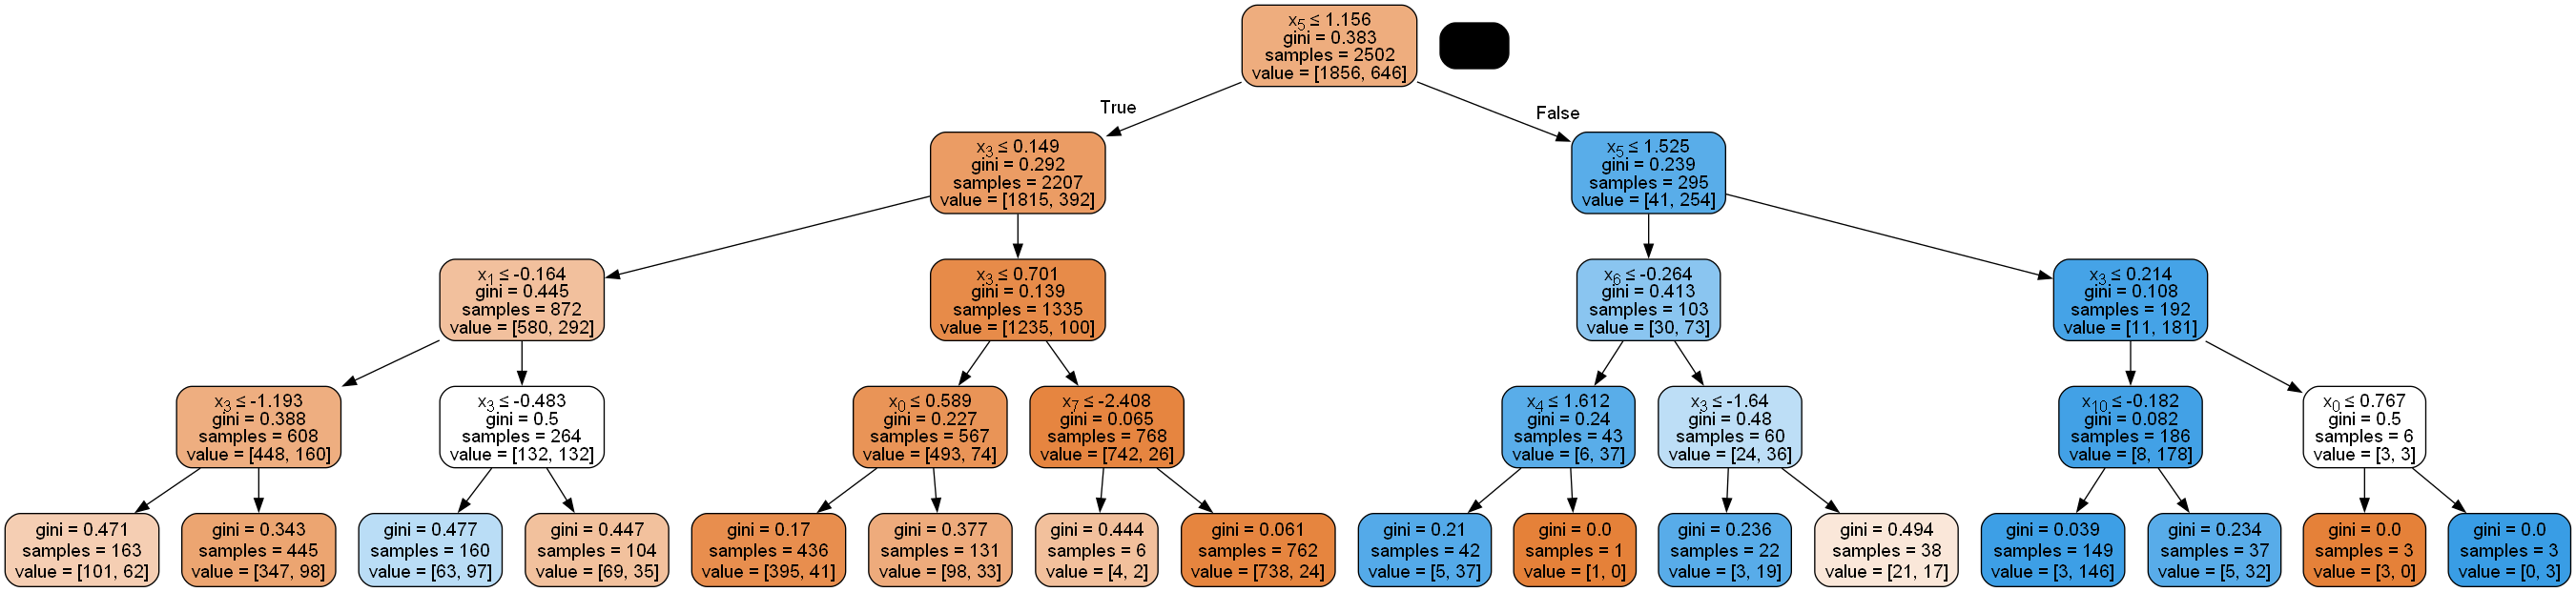

In [406]:
tree = DecisionTreeClassifier(max_depth=4)
tree, accuracy_tree, roc_auc_tree, coh_kap_tree, clsrp_tree = run_model(tree, X_train, y_train, X_test, y_test)
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

### RandomForestClassifier Model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished


Training set score: 0.8505
Test set score: 0.8228
Cross-validation scores: [0.83033932 0.84031936 0.85       0.84       0.854     ]
Mean accuracy: 0.842931736526946
Standard deviation: 0.008324125277122915
ROC Area under Curve = 0.6959430409772875
Cohen's Kappa = 0.46108828941974767
classification_report
:               precision    recall  f1-score   support

           0       0.83      0.96      0.89       616
           1       0.80      0.43      0.56       219

    accuracy                           0.82       835
   macro avg       0.81      0.70      0.72       835
weighted avg       0.82      0.82      0.80       835



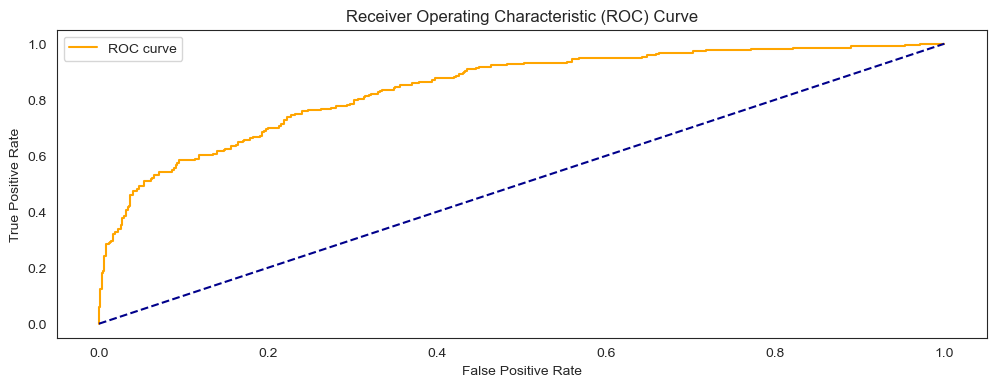

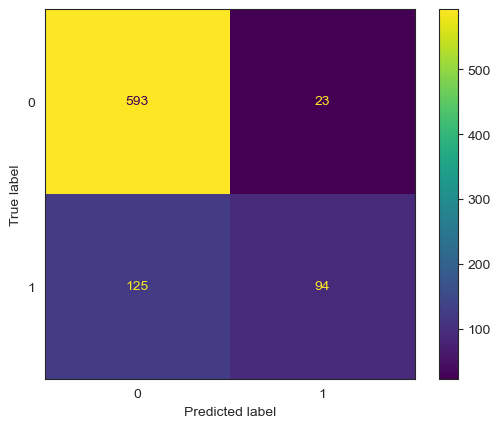

In [434]:
params_rf = {'max_depth': 4,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 10}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, clsrp_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

### XGBoosting Classifier Model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


Training set score: 1.0000
Test set score: 0.8216
Cross-validation scores: [0.81037924 0.83433134 0.824      0.828      0.828     ]
Mean accuracy: 0.824942115768463
Standard deviation: 0.007997795721039163
ROC Area under Curve = 0.7230882701773114
Cohen's Kappa = 0.4917625624497033
classification_report
:               precision    recall  f1-score   support

           0       0.84      0.93      0.88       616
           1       0.72      0.52      0.60       219

    accuracy                           0.82       835
   macro avg       0.78      0.72      0.74       835
weighted avg       0.81      0.82      0.81       835



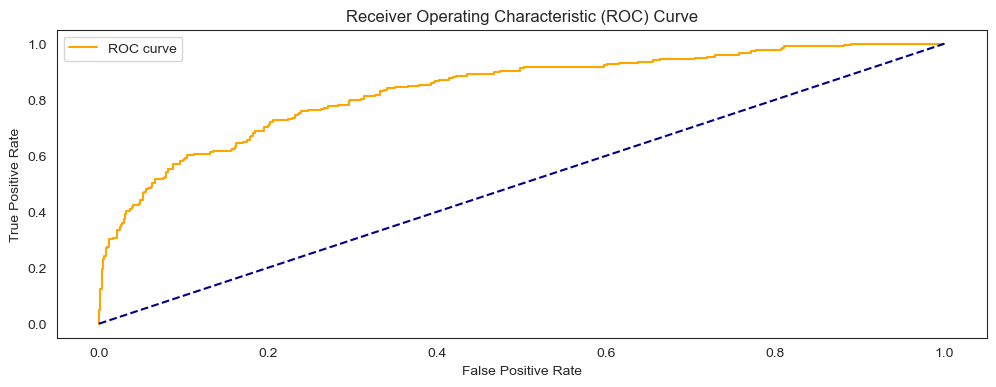

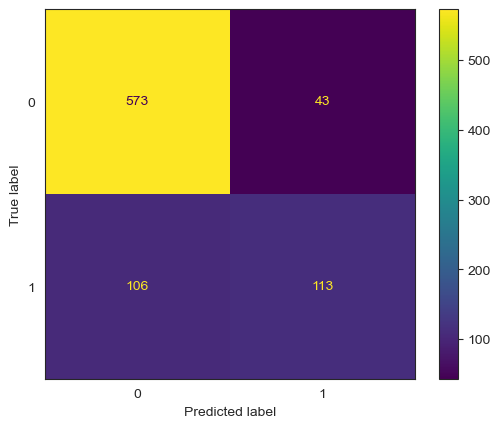

In [407]:
model_xgb = XGBClassifier(objective = 'binary:logistic', random_state = 10)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, clsrp_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### GradientBoostingClassifier Model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished


Training set score: 0.8781
Test set score: 0.8216
Cross-validation scores: [0.8243513  0.84431138 0.84       0.838      0.832     ]
Mean accuracy: 0.8357325349301398
Standard deviation: 0.00693417011676998
ROC Area under Curve = 0.7069026863547412
Cohen's Kappa = 0.4729584898946467
classification_report
:               precision    recall  f1-score   support

           0       0.83      0.95      0.89       616
           1       0.76      0.47      0.58       219

    accuracy                           0.82       835
   macro avg       0.80      0.71      0.73       835
weighted avg       0.81      0.82      0.81       835



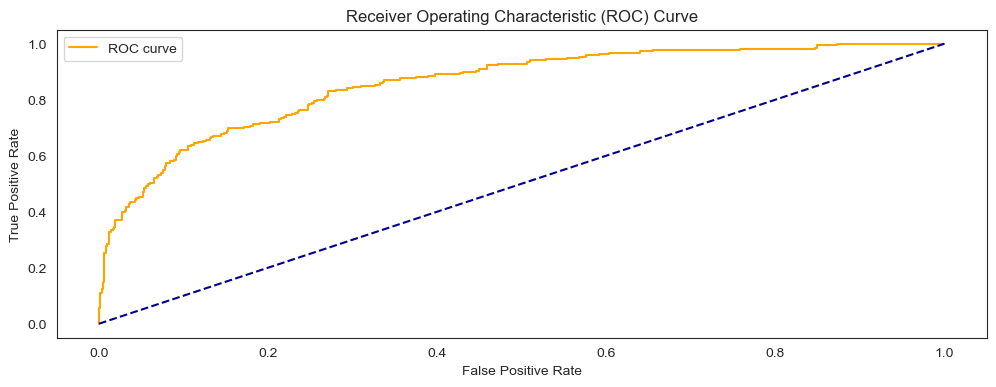

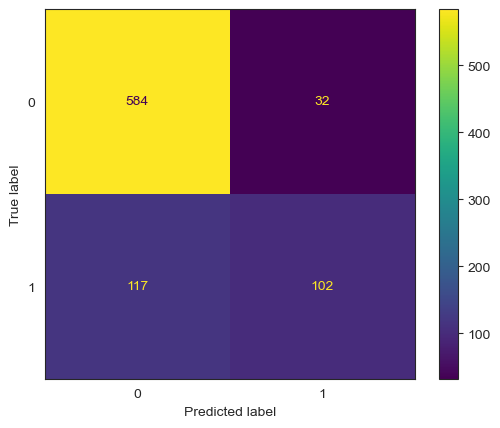

In [411]:
model_gbc = GradientBoostingClassifier(random_state=10)             
model_gbc, accuracy_gbc, roc_auc_gbc, coh_kap_gbc, clsrp_gbc = run_model(model_gbc, X_train, y_train, X_test, y_test)

### Cross-Validing the Models
------------------------------

In [415]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': 'roc_auc',  # Using the built-in scorer
    'cohen_kappa': make_scorer(cohen_kappa_score)
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    cohen_kappa_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(cohen_kappa_score))
    
    results[model_name] = {
        'accuracy': np.mean(scores),
        'roc_auc': np.mean(roc_auc_scores),
        'cohen_kappa': np.mean(cohen_kappa_scores),
        'accuracy_std': np.std(scores),
        'roc_auc_std': np.std(roc_auc_scores),
        'cohen_kappa_std': np.std(cohen_kappa_scores)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f} ± {metrics['accuracy_std']:.4f}")
    print(f"  ROC AUC: {metrics['roc_auc']:.4f} ± {metrics['roc_auc_std']:.4f}")
    print(f"  Cohen's Kappa: {metrics['cohen_kappa']:.4f} ± {metrics['cohen_kappa_std']:.4f}")

Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...

Logistic Regression:
  Accuracy: 0.8345 ± 0.0127
  ROC AUC: 0.8580 ± 0.0125
  Cohen's Kappa: 0.5342 ± 0.0351

Decision Tree:
  Accuracy: 0.7710 ± 0.0120
  ROC AUC: 0.6988 ± 0.0231
  Cohen's Kappa: 0.3963 ± 0.0613

Random Forest:
  Accuracy: 0.8377 ± 0.0070
  ROC AUC: 0.8499 ± 0.0110
  Cohen's Kappa: 0.5216 ± 0.0145

Gradient Boosting:
  Accuracy: 0.8353 ± 0.0076
  ROC AUC: 0.8605 ± 0.0112
  Cohen's Kappa: 0.5302 ± 0.0301

XGBoost:
  Accuracy: 0.8249 ± 0.0080
  ROC AUC: 0.8351 ± 0.0128
  Cohen's Kappa: 0.5091 ± 0.0263


**Best Model Overall : GradientBoostingClassifier & RandomForestClassifier**

### Feature Weightage
---------------------

In [437]:
import eli5
from eli5.sklearn import PermutationImportance

model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(X_train, y_train)

# Calculate permutation importance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

# Display the feature importances
feature_names = Features.columns.tolist()
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0426 ± 0.0069,Humidity3pm
0.0273 ± 0.0073,Sunshine
0.0141 ± 0.0051,Rainfall
0.0120 ± 0.0034,Cloud9am
0.0103 ± 0.0032,Humidity9am
0.0067 ± 0.0042,Cloud3pm
0.0057 ± 0.0059,Temp3pm
0.0057 ± 0.0055,Evaporation
0.0026 ± 0.0018,RainToday
0.0024 ± 0.0064,Pressure3pm


--------------------------------------------------------
### Hyperparameter Tuning for Best model : GRB Classifier
----------------------------------------------------------

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best cross-validation score: 0.8646988388537455
Accuracy: 0.8240
ROC AUC: 0.8502
Cohen's Kappa: 0.4693


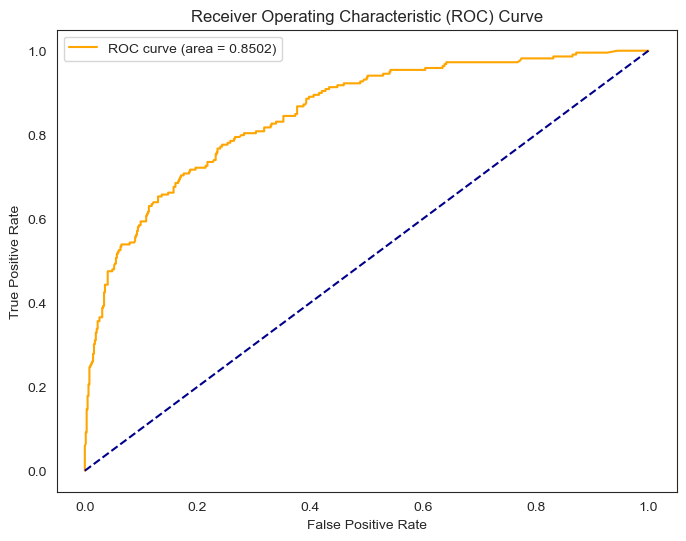

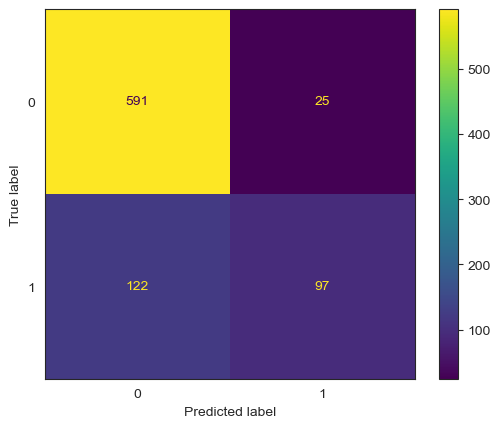

In [428]:
# Define the model
model = GradientBoostingClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

# Results and conclusion:
-------------------------
* The GradientBoostingClassifier model accuracy score is 0.8640 So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.
* Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.
* The model shows no signs of overfitting.(Train_score = 87%, Test_score = 82%)
* Tuning the Parameters of GBC results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.
* ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

------------------------
# Questions to Evalute :

##### 1. Your views about the problem statement?
- **After reviewing the data and the problem statement, I believe that "RainTomorrow" is the target variable we need to predict, using 16 independent variables that influence the outcome. As a data scientist, we will employ machine learning models to make predictions.**

##### 2. What will be your approach to solving this task?
* **I will start by exploring the data and performing Exploratory Data Analysis (EDA) and Data Cleaning, followed by statistical analysis, data visualization, and data preprocessing. Finally, I will build a classifier prediction model to predict 'Yes' or 'No' outcomes.**


##### 3. What were the available ML model options you had to perform this task?* **Classification models : LogisticRegression, DecisionTree Classifier, RandomForestClassifier, GradientBoostingClassifier, XGB Classifier**

##### 4. Which model’s performance is best and what could be the possible reason for that?
* **GradientBoostingClassifier is the Best Model because of high accuarcy and ensuring that the model truly captures the underlying patterns rather than overfitting or exploiting data artifacts and through evaluating its Accuracy, ROC-AUC, Cohen's Kappa scores, Gradient Boosting generally outperforms simpler models like Logistic Regression and Decision Tree due to its ability to capture complex patterns and interactions in the data and Gradient Boosting might perform better due to its boosting mechanism as opposed to Random Forest's bagging mechanism.**

##### 5. What steps can you take to improve this selected model’s performance even further?
* **By HyperParameter tuning the GradientBoostingClassifier model to improve the performance,mainly by using GridsearchCV method to get the best parameter to fit the model and improve its performance.**

----------------------------------------------------------------------------